# In this notebook, we plot the different results for each experiment

In [20]:
import functions_preprocessing as func
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns

#import the df
data_directory = 'C:/users/anaho/Desktop/research/Language/APS/analysis/Data/Processed data/'

aps_fr_online = pd.read_csv(data_directory + 'FrenchOnline/CLEAN_french_online_apsData_formatted.csv', encoding = 'latin1')
silent_fr_online = pd.read_csv(data_directory + 'FrenchOnline/CLEAN_french_online_silentData_formatted.csv', encoding = 'latin1')

aps_eng_online = pd.read_csv(data_directory + 'EnglishOnline/CLEAN_english_online_apsData_formatted.csv', encoding = 'latin1')
silent_eng_online = pd.read_csv(data_directory + 'EnglishOnline/CLEAN_english_online_silentData_formatted.csv', encoding = 'latin1')

aps_fr_lab = pd.read_csv(data_directory + 'FrenchLab/CLEAN_lab_apsData.csv', encoding = 'latin1')
silent_fr_lab = pd.read_csv(data_directory + 'FrenchLab/CLEAN_lab_silentData.csv', encoding = 'latin1')

aps_fr_lab.loc[aps_fr_lab['sentence_type'] != 'target', 'condition'] = np.nan
silent_fr_lab.loc[silent_fr_lab['sentence_type'] != 'target', 'condition'] = np.nan

# Define the dictionary for mapping
mapping_dict = {'chinese': 'non-native', 'french': 'native'}

# Apply the mapping to the 'speech_condition' column
aps_fr_lab['speech_condition'] = aps_fr_lab['speech_condition'].map(mapping_dict).fillna(aps_fr_lab['speech_condition'])

In [3]:
def plot_across_conditions(df1, df2, var, participant_col='Session_Name_', condition_col='condition'):
    labels = ['subject plausible', 'subject implausible', 'object plausible', 'object implausible']
    
    if var == 'accuracy':
        # Compute accuracy for both APS and Control groups
        df1 =  df1.groupby([participant_col, condition_col]).apply(
        lambda x: x['PARAPHRASE_ACCURACY'].sum() / len(x)).reset_index(name='accuracy')
        df2 = df2.groupby([participant_col, condition_col]).apply(
        lambda x: x['PARAPHRASE_ACCURACY'].sum() / len(x)).reset_index(name='accuracy')
   
    df1['group'] = 'APS'
    df2['group'] = 'Control'
   
    # Concatenate the two dataframes
    df = pd.concat([df1, df2])
    
    # Prepare data for plotting
    data = pd.concat([df[condition_col], df['group'], df[var]], axis=1)
    
    # Initialize the plot
    f, ax = plt.subplots(figsize=(10, 6))
    
    # Plot boxplot with hue for groups
    fig = sns.boxplot(x=condition_col, y=var, hue='group', data=data)
    
    # Plot the individual data points with stripplot
    sns.stripplot(x=condition_col, y=var, hue='group', data=data, dodge=True, ax=ax, palette='Set2', jitter=True)
    
    # Set custom labels for the x-axis
    fig.set_xticklabels(labels)
    
    # Plot the means with dashed lines for each group
    mins = [0.05, 0.3, 0.55, 0.8]
    maxs = [0.2, 0.45, 0.7, 0.95]

    for i, condition in enumerate(labels):
        aps_mean = df[(df[condition_col] == i+1) & (df['group'] == 'APS')][var].mean()
        control_mean = df[(df[condition_col] == i+1) & (df['group'] == 'Control')][var].mean()
        
        print(aps_mean, control_mean)
        
        ax.axhline(aps_mean, xmin=mins[i], xmax=maxs[i], ls='--', color='y', label='APS Mean' if i == 0 else "")
        ax.axhline(control_mean, xmin=mins[i], xmax=maxs[i], ls='--', color='r', label='Control Mean' if i == 0 else "")
    
    # Adjust legend to not duplicate entries
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys())
    
    plt.show()

In [15]:
def plot_native_vs_nonnative(df, participant_col='Session_Name_', condition_col='condition', status_col='speech_condition'):
    labels = ['subject plausible', 'subject implausible', 'object plausible', 'object implausible']
    
    df_accuracy = df.groupby([participant_col, condition_col, status_col]).apply(lambda x: x['PARAPHRASE_ACCURACY'].sum() / len(x)).reset_index(name='accuracy')
    
    # Prepare data for plotting
    data = pd.concat([df_accuracy[condition_col], df_accuracy[status_col], df_accuracy['accuracy']], axis=1)
    
    # Initialize the plot
    f, ax = plt.subplots(figsize=(10, 6))
    
    # Plot boxplot with hue for native vs non-native
    fig = sns.boxplot(x=condition_col, y='accuracy', hue=status_col, data=data)
    
    # Plot the individual data points with stripplot
    sns.stripplot(x=condition_col, y='accuracy', hue=status_col, data=data, dodge=True, ax=ax, palette='Set2', jitter=True)
    
    # Set custom labels for the x-axis
    fig.set_xticklabels(labels)
    
    # Plot the means with dashed lines for each status
    mins = [0.05, 0.3, 0.55, 0.8]
    maxs = [0.2, 0.45, 0.7, 0.95]


    for i, condition in enumerate(labels):
        native_mean = df_accuracy[(df_accuracy[condition_col] == i+1) & (df_accuracy[status_col] == 'native')]['accuracy'].mean()
        nonnative_mean = df_accuracy[(df_accuracy[condition_col] == i+1) & (df_accuracy[status_col] == 'non-native')]['accuracy'].mean()
        print(native_mean, nonnative_mean)
        ax.axhline(native_mean, xmin=mins[i], xmax=maxs[i], ls='--', color='b', label='Native Mean' if i == 0 else "")
        ax.axhline(nonnative_mean, xmin=mins[i], xmax=maxs[i], ls='--', color='g', label='Non-Native Mean' if i == 0 else "")
    
    # Adjust legend to not duplicate entries
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys())
    
    plt.show()
    

# Example usage:
# plot_native_vs_nonnative(df, participant_col='participant_id', condition_col='condition', status_col='native_status')


In [22]:
def plot_native_vs_nonnative(df, participant_col='Session_Name_', condition_col='condition', status_col='speech_condition', var='accuracy'):
    labels = ['subject plausible', 'subject implausible', 'object plausible', 'object implausible']
    
    if var == 'accuracy':
        # Compute accuracy by grouping and dividing the sum by the number of items
        df_var = df.groupby([participant_col, condition_col, status_col]).apply(lambda x: x['PARAPHRASE_ACCURACY'].sum() / len(x)).reset_index(name='accuracy')
    else:
        # If var is RT or any other continuous measure, no need to sum, just take the mean or use the original values
        df_var = df.groupby([participant_col, condition_col, status_col])[var].mean().reset_index()
    
    # Prepare data for plotting
    data = pd.concat([df_var[condition_col], df_var[status_col], df_var[var]], axis=1)
    
    # Initialize the plot
    f, ax = plt.subplots(figsize=(10, 6))
    
    # Plot boxplot with hue for native vs non-native
    fig = sns.boxplot(x=condition_col, y=var, hue=status_col, data=data)
    
    # Plot the individual data points with stripplot
    sns.stripplot(x=condition_col, y=var, hue=status_col, data=data, dodge=True, ax=ax, palette='Set2', jitter=True)
    
    # Set custom labels for the x-axis
    fig.set_xticklabels(labels)
    
    # Plot the means with dashed lines for each status
    mins = [0.05, 0.3, 0.55, 0.8]
    maxs = [0.2, 0.45, 0.7, 0.95]

    for i, condition in enumerate(labels):
        native_mean = df_var[(df_var[condition_col] == i+1) & (df_var[status_col] == 'native')][var].mean()
        nonnative_mean = df_var[(df_var[condition_col] == i+1) & (df_var[status_col] == 'non-native')][var].mean()
        print(f"Condition: {condition}, Native Mean: {native_mean}, Non-Native Mean: {nonnative_mean}")
        ax.axhline(native_mean, xmin=mins[i], xmax=maxs[i], ls='--', color='b', label='Native Mean' if i == 0 else "")
        ax.axhline(nonnative_mean, xmin=mins[i], xmax=maxs[i], ls='--', color='g', label='Non-Native Mean' if i == 0 else "")
    
    # Adjust legend to not duplicate entries
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys())
    
    plt.show()


0.9600606060606061 0.9710925039872408
0.9292525252525252 0.9516214779372674
0.9334083694083694 0.9237905369484315
0.7597489177489174 0.7893917486022749


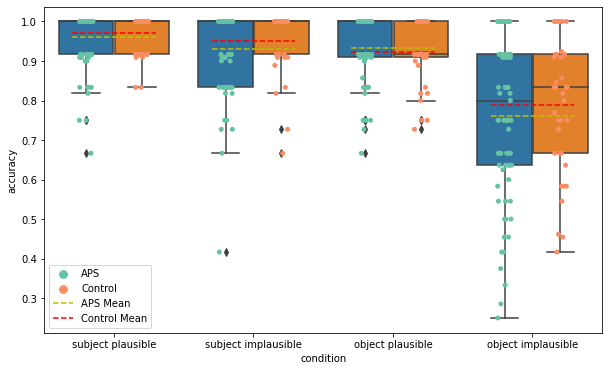

5456.999309553272 5349.7386144916145
5809.278306264804 5574.281095775154
6052.443888244824 6114.107922694766
6750.008452382707 6483.067208061667


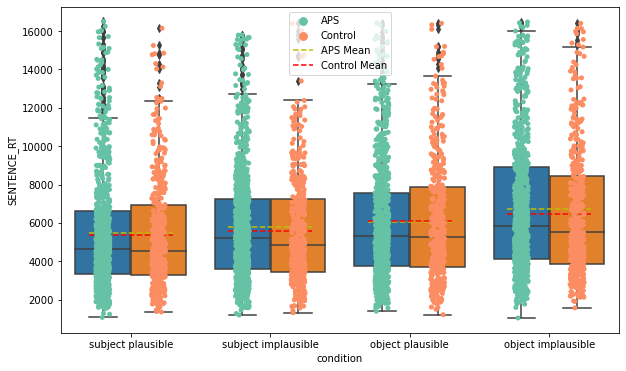

Condition: subject plausible, Native Mean: 0.9715873015873012, Non-Native Mean: 0.9506666666666667
Condition: subject implausible, Native Mean: 0.9331587301587302, Non-Native Mean: 0.9318888888888885
Condition: object plausible, Native Mean: 0.9307142857142857, Non-Native Mean: 0.9415079365079365
Condition: object implausible, Native Mean: 0.7917142857142857, Non-Native Mean: 0.7264867724867725


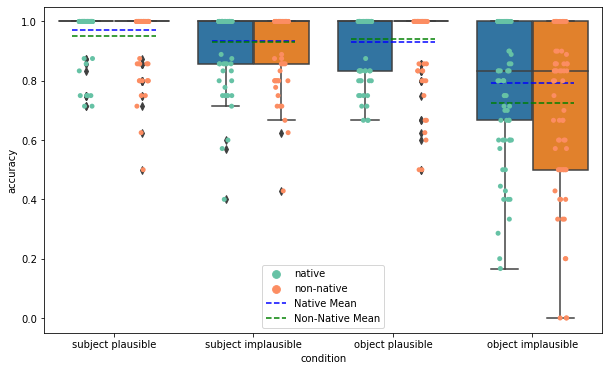

Condition: subject plausible, Native Mean: 5633.809244445232, Non-Native Mean: 5434.718498414635
Condition: subject implausible, Native Mean: 5959.679430687384, Non-Native Mean: 5613.804033863157
Condition: object plausible, Native Mean: 6067.209088891541, Non-Native Mean: 6109.6240634957285
Condition: object implausible, Native Mean: 7050.628075132467, Non-Native Mean: 7058.72174074394


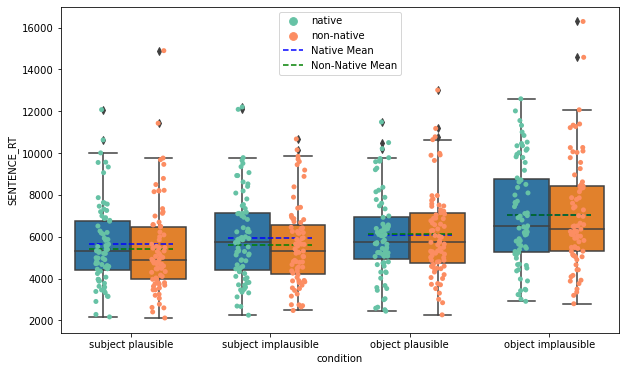

In [24]:
plot_across_conditions(aps_fr_online, silent_fr_online, var='accuracy')
plot_across_conditions(aps_fr_online, silent_fr_online, var='SENTENCE_RT')
plot_native_vs_nonnative(aps_fr_online, var= 'accuracy')
plot_native_vs_nonnative(aps_fr_online, var= 'SENTENCE_RT')

0.9166426166426163 0.9300505050505052
0.8754858104858101 0.9171957671957671
0.8935699855699852 0.8464672232529373
0.7099076479076477 0.6941197691197691


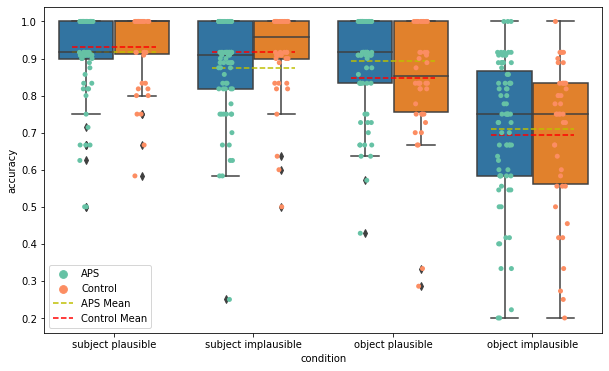

5317.092220828405 4989.997413791288
5583.968535033876 5478.5916488244375
5752.144776123067 5467.350881055888
6191.611054639508 5894.651521740522


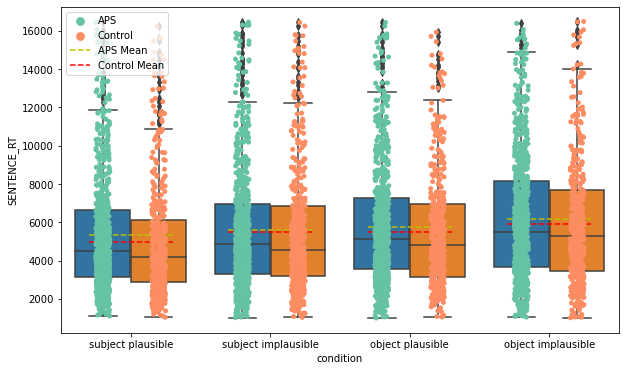

Condition: subject plausible, Native Mean: 0.8939999999999998, Non-Native Mean: 0.943018018018018
Condition: subject implausible, Native Mean: 0.8711111111111111, Non-Native Mean: 0.8744444444444448
Condition: object plausible, Native Mean: 0.8937777777777779, Non-Native Mean: 0.8935555555555555
Condition: object implausible, Native Mean: 0.6871111111111112, Non-Native Mean: 0.727777777777778


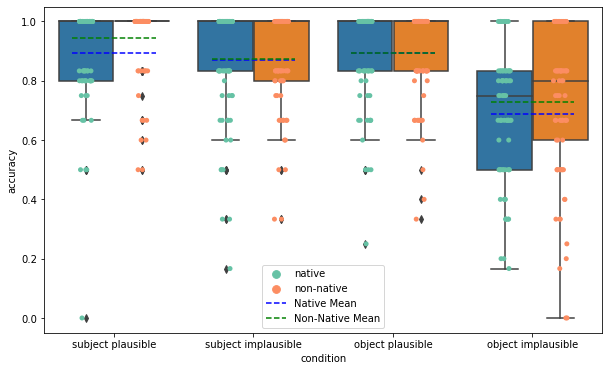

Condition: subject plausible, Native Mean: 5286.916288888851, Non-Native Mean: 5347.529121622131
Condition: subject implausible, Native Mean: 5643.965533337005, Non-Native Mean: 5645.921288889216
Condition: object plausible, Native Mean: 5713.692488891631, Non-Native Mean: 5782.3479555590875
Condition: object implausible, Native Mean: 6453.1795777783, Non-Native Mean: 6053.91482222425


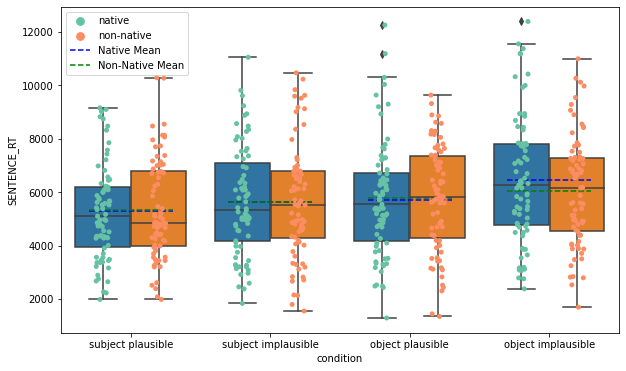

In [25]:
plot_across_conditions(aps_eng_online, silent_eng_online, var='accuracy')
plot_across_conditions(aps_eng_online, silent_eng_online, var='SENTENCE_RT')
plot_native_vs_nonnative(aps_eng_online, var= 'accuracy')
plot_native_vs_nonnative(aps_eng_online, var= 'SENTENCE_RT')


0.9362674362674361 0.9508252164502164
0.9316498316498314 0.9460903679653682
0.8969215969215968 0.9294507575757576
0.752689594356261 0.7869318181818181


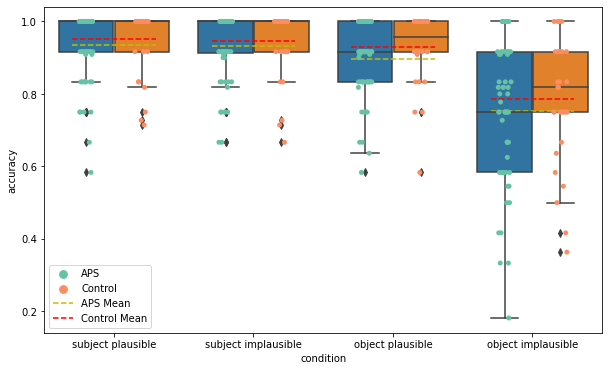

5253.665775401069 4745.125
5586.424489795919 5326.510638297872
5595.0027359781125 5370.104278074867
5985.502092050209 6190.395095367848


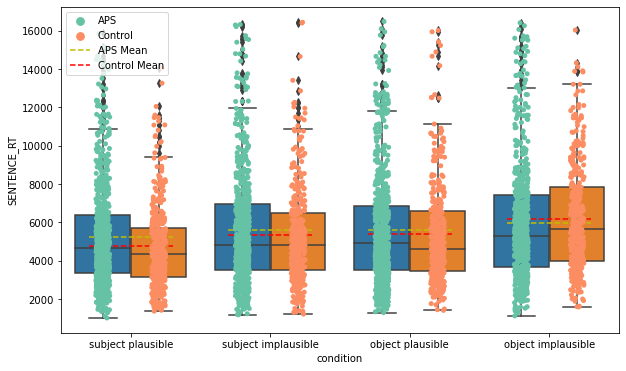

Condition: subject plausible, Native Mean: 0.9497354497354498, Non-Native Mean: 0.9227513227513228
Condition: subject implausible, Native Mean: 0.9246031746031748, Non-Native Mean: 0.936772486772487
Condition: object plausible, Native Mean: 0.8910052910052911, Non-Native Mean: 0.9031746031746034
Condition: object implausible, Native Mean: 0.7544973544973543, Non-Native Mean: 0.7542328042328047


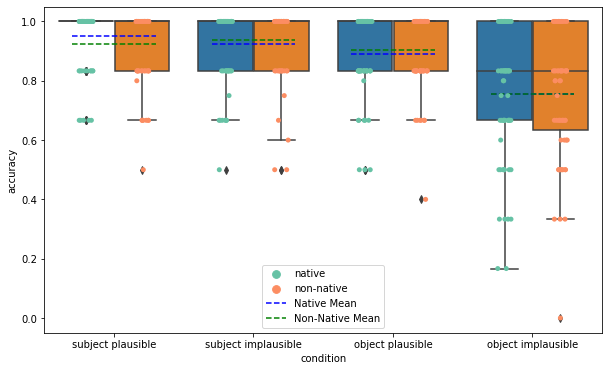

Condition: subject plausible, Native Mean: 5299.718518518517, Non-Native Mean: 5248.4978835978845
Condition: subject implausible, Native Mean: 5625.65238095238, Non-Native Mean: 5696.098941798942
Condition: object plausible, Native Mean: 5564.904232804232, Non-Native Mean: 5784.915343915342
Condition: object implausible, Native Mean: 6069.119576719577, Non-Native Mean: 6264.326984126984


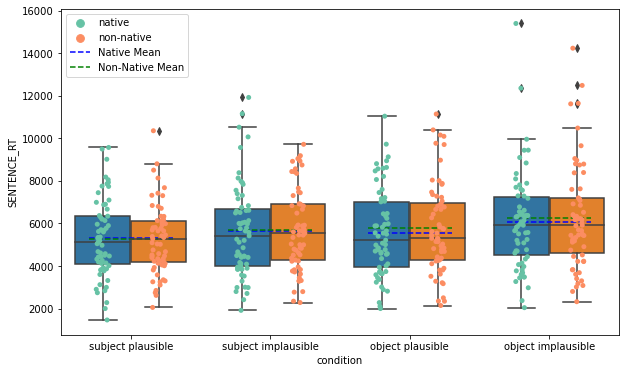

In [26]:
plot_across_conditions(aps_fr_lab, silent_fr_lab, var='accuracy')
plot_across_conditions(aps_fr_lab, silent_fr_lab, var='SENTENCE_RT')
plot_native_vs_nonnative(aps_fr_lab, var = 'accuracy')
plot_native_vs_nonnative(aps_fr_lab, var = 'SENTENCE_RT')